Henry Ding

August 6, 2022

CIS Week 2 HW

# HW Part 1
## Semi-Empirical Mass Formula Calculation
The semi-empirical formula gives the binding energy $E_B$ for Gamow's liquid drop nuclear model:
$
\begin{equation}
E_B = a_VA - a_SA^{2/3} - a_c\frac{Z(Z-1)}{A^{1/3}} - a_A \frac{(N-Z)^2}{A} + \delta(N, Z)
\end{equation}
$
where:
* $A$: mass number
* $Z$: atomic number
* $N$: neutron number
* $\delta(A, Z) = \begin{cases}
+\delta_0 \times A^{-3/4} & \text{ for even } N, Z \\
0 & \text{ for odd } A \\
-\delta_0 \times A^{-3/4} & \text{ for odd } N, Z
\end{cases}$ 
* $a_V, a_S, a_C, a_A$ are model parameters. The least squares fit gives the following values:

$
\begin{array} {|l|l|}
\hline
a_V & 15.8 \;\mathrm{MeV} \\
\hline
a_S & 18.3 \;\mathrm{MeV} \\
\hline
a_C & 0.714 \;\mathrm{MeV} \\
\hline
a_A & 23.2 \;\mathrm{MeV} \\
\hline
\delta_0 & 34 \;\mathrm{MeV}\\
\hline
\end{array}
$

## Problems
1. Implement a Python function to calculate $E_B(A, Z) / A$.

In [61]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [62]:
def get_E_B(params, A, Z):
    """
    Returns binding energy as predicted by the semi-empirical mass formula given
    
    Params:
    - A: mass number
    - Z: atomic number
    """
    N = A - Z
    delta_sign = np.logical_and(N % 2 == 0, Z % 2 == 0).astype(int) - np.logical_and(N % 2 == 1, Z % 2 == 1).astype(int)
    return params['a_V'] * A \
    - params['a_S'] * A ** (2/3) \
    - params['a_C'] * Z * (Z - 1) / (A ** (1/3)) \
    + params['a_A'] * (N - Z) * (N - Z) / A \
    + params['d0'] * delta_sign / (A ** (3/4))

def get_per_nucleon_E_B(params, A, Z):
    return get_E_B(params, A, Z) / A

In [63]:
# least-squares semi-empirical mass formula parameters
LS_PARAMS = {
    'a_V': 15.8,
    'a_S': 18.3,
    'a_C': 0.714,
    'a_A': 23.2,
    'd0': 32,
    'unit': 'MeV'
}

1. (a) Using that function calculate $E_B$ for the hydrogen isotopes.

In [64]:
# hydrogen binding energies
H1, H2, H3 = (get_E_B(LS_PARAMS, x + 1, 1) for x in range(3))
H1_A, H2_A, H3_A =  (get_per_nucleon_E_B(LS_PARAMS, x + 1, 1) for x in range(3))
unit = LS_PARAMS['unit']

print("Binding Energy")
print(f"Hydrogen: {H1} {unit}\nDeuterium: {H2} {unit}\nTritrium: {H3} {unit}")
print("\nBinding Energy per Nucleon")
print(f"Hydrogen: {H1_A} {unit}\nDeuterium: {H2_A} {unit}\nTritrium: {H3_A} {unit}")

Binding Energy
Hydrogen: 20.7 MeV
Deuterium: -16.476753091061585 MeV
Tritrium: 17.067799371483495 MeV

Binding Energy per Nucleon
Hydrogen: 20.7 MeV
Deuterium: -8.238376545530793 MeV
Tritrium: 5.689266457161165 MeV


1. (b) Calculate and plot $E_B/A$ v.s. $A$ for $A=Z$ and up to $A=16$.

In [65]:
A = Z = np.arange(1, 17)
ratios = get_per_nucleon_E_B(LS_PARAMS, A, Z)
ratios

array([20.7       , 33.42223512, 25.32136878, 28.95077407, 26.62789615,
       28.35566147, 27.19403426, 28.19189642, 27.45623444, 28.09225686,
       27.56104868, 27.98979042, 27.57329833, 27.87167231, 27.52653416,
       27.73737387])

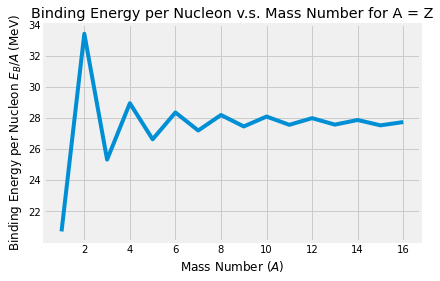

In [66]:
%matplotlib inline
# set axis and graph titles
ax = plt.gca()
ax.set_xlabel(r'Mass Number $(A)$')
ax.set_ylabel(r'Binding Energy per Nucleon $E_B/A \;(\mathrm{MeV})$')
ax.set_title('Binding Energy per Nucleon v.s. Mass Number for A = Z')
# plot E_B/A v.s. A points
plt.plot(A, ratios)
plt.show()

1. (c) c. Starting from Pb-208 calculate and plot $E_B/A$ vs $A$ after adding 1 - 10 protons and after adding 1-10 neutrons to the $\mathrm{Pb}$ nucleus

In [67]:
# adding 1-10 protons
A_p = 208 + np.arange(1, 11)  # original mass number for lead-208 is 208
Z_p = 82 + np.arange(1, 11)  # atomic number for lead is 82
ratios_p = get_per_nucleon_E_B(LS_PARAMS, A_p, Z_p)
# adding 1-10 nuetrons
A_n = 208 + np.arange(1, 11)
Z_n = 82  # atomic number for lead and additional neutrons always 82
ratios_n = get_per_nucleon_E_B(LS_PARAMS, A_n, Z_n)

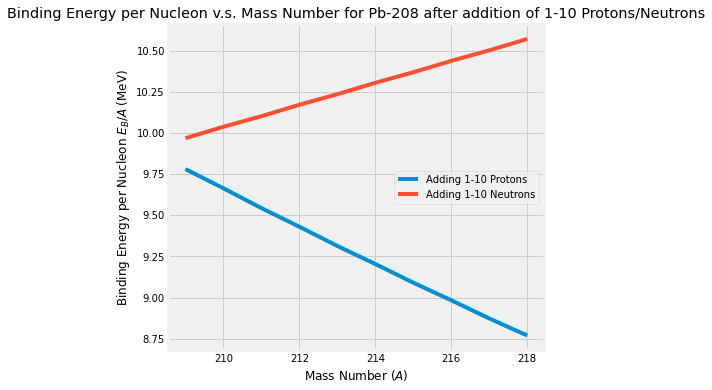

In [68]:
%matplotlib inline
# set axis and graph titles
plt.figure(figsize=(6, 6))
ax = plt.gca()
ax.set_xlabel(r'Mass Number $(A)$')
ax.set_ylabel(r'Binding Energy per Nucleon $E_B/A \;(\mathrm{MeV})$')
ax.set_title('Binding Energy per Nucleon v.s. Mass Number for Pb-208 after addition of 1-10 Protons/Neutrons')
# plot E_B/A v.s. A points
plt.plot(A_p, ratios_p, label='Adding 1-10 Protons')
plt.plot(A_n, ratios_n, label='Adding 1-10 Neutrons')
ax.legend(loc='right')
plt.show()

# HW Part 2

2. (a) Write Python code that reads this text file (`Exercise1_data.txt`):

In [69]:
# loads text file into numpy array
file_path = 'Exercise1_data.txt'
try:
    f = np.loadtxt(file_path)
except (FileNotFoundError, OSError):
    print(f"File '{file_path}' not found")

2. (b) Create and plot a histogram of the data in Column 8 of the file

(array([129.,  68.,  30.,   5.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.,  170.,  340.,  510.,  680.,  850., 1020., 1190., 1360.,
        1530., 1700.]),
 <BarContainer object of 10 artists>)

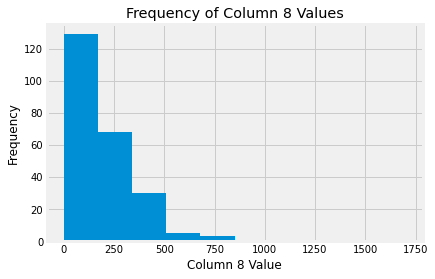

In [70]:
ax = plt.gca()
ax.set_xlabel(r'Column 8 Value')
ax.set_ylabel(r'Frequency')
ax.set_title('Frequency of Column 8 Values')
# plots histogram of 8th element in each row (column 8)
plt.hist(f[:, 8])

2. (c) Calculate the average of the values in column 8

In [71]:
# column 8 average value
np.average(f[:, 8])

193.05249746105085